In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#note, this function expects a matrix_reverseA[ix,iy] 
#and then displays so that A[:,0] is the lowest row of pixels
pwargs = {'interpolation':'nearest'}

#Frame Counter
class counter():
    count = 0
    def __init__(self) -> None:
        pass

def display1(A):
    maxX = A.shape[0]
    maxY = A.shape[1]
    B = np.zeros((maxY, maxX))
    for ix in range(0,maxX):
        for iy in range(0,maxY):
            B[maxY-1-iy,ix] = A[ix,iy]

    %matplotlib osx 
    
    plt.rcParams['figure.figsize'] = [6, 6/maxX*maxY]
    plt.imshow(B,cmap=plt.cm.gist_ncar, **pwargs); 
    #plt.imshow(B); 
    plt.axis('off'); 
    plt.show()
    plt.draw()
    plt.pause(0.05)
    
    filename = './animation3/frame' + str(counter.count)

    plt.savefig(filename)
    counter.count += 1

-----
-----

# Rock Paper Scissors 4 Ways

-----
-----

In [3]:
def rps():
    ############ INITIALIZATION ############

    counter.count = 0

    nParticles = 100000
    maxX = 100
    maxY = 100

    A = np.zeros((maxX, maxY))

    #Bottom Up
    A[:,0] = 9

    yBuffer = 5
    yStart  = 1 + yBuffer

    #Top Down
    A[:,maxY-1] = 1

    yBuffer_reverse = 5
    yStart_reverse = maxY - yBuffer_reverse

    #Left Right
    A[0,:] = 15

    xBuffer = 5
    xStart  = 1 + xBuffer

    #Right Left
    A[maxX-1, :] = 4

    xBuffer_reverse = 5
    xStart_reverse = maxX - xBuffer_reverse

    for i in range(0,nParticles):
        #TOP DOWN

        x_reverse = np.random.randint(0,maxX)
        y_reverse  = yStart_reverse; #always start at upper limit

        #rxn_chance = np.random.random();
        #q = .5

        while True:
            xOrg_reverse = x_reverse
            yOrg_reverse = y_reverse

            r2 = np.random.random(); # Random float:  0.0 <= r < 1.0
            #based on the value of 'r', move the particle
            #left, right, up, or down and change x and y accordingly
            if r2 < .25:
                x_reverse+= 1
            elif .25 < r2  <.5:
                x_reverse-= 1
            elif .5 < r2 < .75:
                y_reverse += 1
            elif .75 < r2 < 1:
                y_reverse -= 1

            #determine the x coordionates of the left and right neighbors
            #store them in 'xm' and 'xp' and apply periodic boundary conditions again
            xp_reverse = (x_reverse+ 1) % maxX
            xm_reverse = (x_reverse- 1) % maxX
            yp_reverse = y_reverse + 1 % maxY
            ym_reverse = y_reverse - 1 % maxY
            

            while yp_reverse >= maxY:
                yp_reverse -= 1
            while y_reverse >= maxY:
                y_reverse -= 1

            x_reverse= x_reverse % maxX
                
            if (A[x_reverse,y_reverse] == 1 or y_reverse<yStart_reverse): 
                x_reverse = xOrg_reverse
                y_reverse = yOrg_reverse
                continue; # if this site has been taken try moving in a different direction

            p2 = .2
            chance2 = np.random.random();

            if chance2 < p2:
                #If there is a neighbor adjacent, stick and react
                if (A[xp_reverse, y_reverse] == 1) or (A[xm_reverse, y_reverse] == 1) or (A[x_reverse, yp_reverse] == 1) or (A[x_reverse, ym_reverse] == 1): 
                    A[x_reverse,y_reverse] = 1
                    if (y_reverse-yBuffer_reverse<yStart_reverse and y_reverse-yBuffer_reverse>0): 
                        yStart_reverse = y_reverse-yBuffer_reverse

                    if (A[xp_reverse, y_reverse] == 15) or (A[xm_reverse, y_reverse] == 15) or (A[x_reverse, yp_reverse] == 15) or (A[x_reverse, ym_reverse] == 15):
                        A[xp_reverse, y_reverse] = 1
                        A[xm_reverse, y_reverse] = 1
                        A[x_reverse, yp_reverse] = 1
                        A[x_reverse, ym_reverse] = 1


                    if (i%1000==0): 
                        print(f'i= {i} \tx={x_reverse} \ty={y_reverse} \tyStart_reverse={yStart_reverse}')
                        #print(f'i= {i} \tx={x} \ty={y} \tyStart_reverse={yStart}')


                    nNewParticlesPerFrame = 100 
                    if (i%nNewParticlesPerFrame==0): 
                        display1(A)
                        
                    break # particle was attached, break out of current loop and insert next one
                    
        if (yStart_reverse-1==0): 
            print(f'Structures reached Y limit after only {i} particles')
            print('Top Down is the winner!')
            rps_wins[0] += 1
            break

        # BOTTOM UP

        x  = np.random.randint(0,maxX)
        y  = yStart; #always start at upper limit

        while True:
            xOrg = x
            yOrg = y

            r = np.random.random(); # Random float:  0.0 <= r < 1.0
            #based on the value of 'r', move the particle
            #left, right, up, or down and change x and y accordingly
            if r < .25:
                x += 1
            elif .25 < r  <.5:
                x -= 1
            elif .5 < r < .75:
                y += 1
            elif .75 < r < 1:
                y -= 1

            #determine the x coordionates of the left and right neighbors
            #store them in 'xm' and 'xp' and apply periodic boundary conditions again
            xp = (x + 1) % maxX
            xm = (x - 1) % maxX
            yp = y + 1
            ym = y - 1
            
            #Periodic boundary -- not used for this project since there will be 4 different trees
            #Change this later
            x = x % maxX
            
            if (A[x,y] == 9 or y>yStart): 
                x = xOrg
                y = yOrg
                continue; # if this site has been taken try moving in a different direction

            # Determine if any neighboring site is occupied
            # if that is the case, enter the following 'if' clause

            p = .2
            chance = np.random.random();


            if chance < p:
                #If there is a neighbor adjacent, stick and react
                if (A[xp, y] == 9) or (A[xm, y] == 9) or (A[x, yp] == 9) or (A[x, ym] == 9): 
                    A[x,y] = 9
                    
                    # if A[xp, y] == 4:
                        #A[x, y] = 9
                    if A[xp, y] == 4 or A[xm, y] == 4 or A[x, yp] == 4 or A[x, ym] == 4:
                        A[xp, y] = 9
                        A[xm, y] = 9
                        A[x, yp] = 9
                        A[x, ym] = 9

                    if (y+yBuffer>yStart and y+yBuffer<maxY): 
                        yStart = y+yBuffer

                    if (i%1000==0): 
                        print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                    nNewParticlesPerFrame = 100 
                    if (i%nNewParticlesPerFrame==0): 
                        display1(A)
                        
                    break # particle was attached, break out of current loop and insert next one
                
        if (yStart+1==maxY): 
            print(f'Structures reached Y limit after only {i} particles')
            print('Bottom up is the winner!')
            rps_wins[1] += 1
            break

        # LEFT TO RIGHT

        y  = np.random.randint(0,maxY)
        x  = xStart; #always start at upper limit

        while True:
            xOrg = x
            yOrg = y

            r = np.random.random(); # Random float:  0.0 <= r < 1.0
            #based on the value of 'r', move the particle
            #left, right, up, or down and change x and y accordingly
            if r < .25:
                x += 1
            elif .25 < r  <.5:
                x -= 1
            elif .5 < r < .75:
                y += 1
            elif .75 < r < 1:
                y -= 1

            #determine the x coordionates of the left and right neighbors
            #store them in 'xm' and 'xp' and apply periodic boundary conditions again
            xp = (x + 1) 
            xm = (x - 1)
            yp = (y + 1) % maxY
            ym = (y - 1) % maxY
            
            #Periodic boundary -- not used for this project since there will be 4 different trees
            #Change this later
            y = y % maxY
            
            if (A[x,y] == 15 or x>xStart): 
                x = xOrg
                y = yOrg
                continue; # if this site has been taken try moving in a different direction
            


            # Determine if any neighboring site is occupied
            # if that is the case, enter the following 'if' clause

            p = .2
            chance = np.random.random();

            if chance < p:
                #If there is a neighbor adjacent, stick and react
                if (A[xp, y] == 15) or (A[xm, y] == 15) or (A[x, yp] == 15) or (A[x, ym] == 15): 
                    A[x,y] = 15
                    if (x+xBuffer>xStart and x+xBuffer<maxX): 
                        xStart = x+xBuffer

                    if (A[xp, y] == 9) or (A[xm, y] == 9) or (A[x, yp] == 9) or (A[x, ym] == 9):
                        A[xp, y] = 15
                        A[xm, y] = 15
                        A[x, yp] = 15
                        A[x, ym] = 15

                    if (i%1000==0): 
                        print(f'i= {i} \tx={x} \ty={y} \tyStart={xStart}')

                    nNewParticlesPerFrame = 100 
                    if (i%nNewParticlesPerFrame==0): 
                        display1(A)
                        
                    break # particle was attached, break out of current loop and insert next one
                
        if (xStart+1==maxX): 
            print(f'Structures reached X limit after only {i} particles')
            print('Left to Right Wins')
            rps_wins[2] += 1
            break

        # Right to Left

            # Compute new starting point on the line y=yStart_reverse
        y_reverse = np.random.randint(0,maxY)
        x_reverse  = xStart_reverse; #always start at upper limit

        # rxn_chance = np.random.random();
        # q = .5

        while True:
            xOrg_reverse = x_reverse
            yOrg_reverse = y_reverse

            r2 = np.random.random(); # Random float:  0.0 <= r < 1.0
            #based on the value of 'r', move the particle
            #left, right, up, or down and change x and y accordingly
            if r2 < .25:
                x_reverse+= 1
            elif .25 < r2  <.5:
                x_reverse-= 1
            elif .5 < r2 < .75:
                y_reverse += 1
            elif .75 < r2 < 1:
                y_reverse -= 1

            #determine the x coordionates of the left and right neighbors
            #store them in 'xm' and 'xp' and apply periodic boundary conditions again
            xp_reverse = (x_reverse+ 1) % maxX
            xm_reverse = (x_reverse- 1) % maxX
            yp_reverse = (y_reverse + 1) % maxY
            ym_reverse = (y_reverse - 1) % maxY
            
            #Periodic boundary -- not used for this project since there will be 4 different trees
            #Change this later
            y_reverse= y_reverse % maxY
            
            while xp_reverse >= maxX:
                xp_reverse -= 1
            while x_reverse >= maxX:
                x_reverse -= 1

            if (A[x_reverse,y_reverse] == 4 or x_reverse<xStart_reverse): 
                x_reverse = xOrg_reverse
                y_reverse = yOrg_reverse
                continue; # if this site has been taken try moving in a different direction

            # Determine if any neighboring site is occupied
            # if that is the case, enter the following 'if' clause

            p2 = .2
            chance2 = np.random.random();

            if chance2 < p2:
                #If there is a neighbor adjacent, stick and react
                if (A[xp_reverse, y_reverse] == 4) or (A[xm_reverse, y_reverse] == 4) or (A[x_reverse, yp_reverse] == 4) or (A[x_reverse, ym_reverse] == 4): 
                    A[x_reverse,y_reverse] = 4
                    if (x_reverse-xBuffer_reverse<xStart_reverse and x_reverse-xBuffer_reverse>0): 
                        xStart_reverse = x_reverse-xBuffer_reverse

    
                    if (A[xp_reverse, y_reverse] == 1) or (A[xm_reverse, y_reverse] == 1) or (A[x_reverse, yp_reverse] == 1) or (A[x_reverse, ym_reverse] == 1):
                        A[xp_reverse, y_reverse] = 4
                        A[xm_reverse, y_reverse] = 4
                        A[x_reverse, yp_reverse] = 4
                        A[x_reverse, ym_reverse] = 4

                    if (i%1000==0): 
                        print(f'i= {i} \tx={x_reverse} \ty={y_reverse} \tyStart_reverse={xStart_reverse}')
                        #print(f'i= {i} \tx={x} \ty={y} \tyStart_reverse={yStart}')


                    nNewParticlesPerFrame = 100 
                    if (i%nNewParticlesPerFrame==0): 
                        display1(A)
                        
                    break # particle was attached, break out of current loop and insert next one
                    
        if (xStart_reverse-1==0): 
            print(f'Structures reached Y limit after only {i} particles')
            print('Right Left is the winner!')
            rps_wins[3] += 1
            break

    display1(A)      

-----
-----
# 2 versus 2: Featuring Offense and Defense
-----
-----

In [4]:
def two_v_two():
    ############ INITIALIZATION ############

    counter.count = 0

    nParticles = 100000
    maxX = 100
    maxY = 100

    A = np.zeros((maxX, maxY))

    #Bottom Up
    A[:,0] = 9

    yBuffer = 5
    yStart  = 1 + yBuffer

    #Top Down
    A[:,maxY-1] = 1

    yBuffer_reverse = 5
    yStart_reverse = maxY - yBuffer_reverse

    #Left Right
    A[0,:] = 15

    xBuffer = 5
    xStart  = 1 + xBuffer

    #Right Left
    A[maxX-1, :] = 4

    xBuffer_reverse = 5
    xStart_reverse = maxX - xBuffer_reverse

    #Stop conditions
    LR_stop = 0
    RL_stop = 0

    for i in range(0,nParticles):
        #TOP DOWN

        x_reverse = np.random.randint(0,maxX)
        y_reverse  = yStart_reverse; #always start at upper limit

        #rxn_chance = np.random.random();
        #q = .5

        while True:
            #Top Down
            xOrg_reverse = x_reverse
            yOrg_reverse = y_reverse

            r2 = np.random.random(); # Random float:  0.0 <= r < 1.0
            #based on the value of 'r', move the particle
            #left, right, up, or down and change x and y accordingly
            if r2 < .25:
                x_reverse+= 1
            elif .25 < r2  <.5:
                x_reverse-= 1
            elif .5 < r2 < .75:
                y_reverse += 1
            elif .75 < r2 < 1:
                y_reverse -= 1

            #determine the x coordionates of the left and right neighbors
            #store them in 'xm' and 'xp' and apply periodic boundary conditions again
            xp_reverse = (x_reverse+ 1) % maxX
            xm_reverse = (x_reverse- 1) % maxX
            yp_reverse = y_reverse + 1 % maxY
            ym_reverse = y_reverse - 1 % maxY
            

            while yp_reverse >= maxY:
                yp_reverse -= 1
            while y_reverse >= maxY:
                y_reverse -= 1

            x_reverse= x_reverse % maxX
                
            if (A[x_reverse,y_reverse] == 1 or y_reverse<yStart_reverse): 
                x_reverse = xOrg_reverse
                y_reverse = yOrg_reverse
                continue; # if this site has been taken try moving in a different direction

            p2 = .2
            chance2 = np.random.random();

            if chance2 < p2:
                #If there is a neighbor adjacent, stick and react
                if (A[xp_reverse, y_reverse] == 1) or (A[xm_reverse, y_reverse] == 1) or (A[x_reverse, yp_reverse] == 1) or (A[x_reverse, ym_reverse] == 1): 
                    A[x_reverse,y_reverse] = 1
                    if (y_reverse-yBuffer_reverse<yStart_reverse and y_reverse-yBuffer_reverse>0): 
                        yStart_reverse = y_reverse-yBuffer_reverse

                    if (A[xp_reverse, y_reverse] == 4) or (A[xm_reverse, y_reverse] == 4) or (A[x_reverse, yp_reverse] == 4) or (A[x_reverse, ym_reverse] == 4):
                        A[x_reverse,y_reverse] = 0
                        A[xp_reverse, y_reverse] = 0
                        A[xm_reverse, y_reverse] = 0
                        A[x_reverse, yp_reverse] = 0
                        A[x_reverse, ym_reverse] = 0

                    if (i%1000==0): 
                        print(f'i= {i} \tx={x_reverse} \ty={y_reverse} \tyStart_reverse={yStart_reverse}')
                        #print(f'i= {i} \tx={x} \ty={y} \tyStart_reverse={yStart}')


                    nNewParticlesPerFrame = 100 
                    if (i%nNewParticlesPerFrame==0): 
                        display1(A)
                        
                    break # particle was attached, break out of current loop and insert next one
                    
        if (yStart_reverse-1==0): 
            print(f'Structures reached Y limit after only {i} particles')
            print('Top Down and Left Right team is the winner!')
            two_v_two_wins[0] += 1
            break

        # BOTTOM UP

        x  = np.random.randint(0,maxX)
        y  = yStart; #always start at upper limit

        while True:
            xOrg = x
            yOrg = y

            r = np.random.random(); # Random float:  0.0 <= r < 1.0
            #based on the value of 'r', move the particle
            #left, right, up, or down and change x and y accordingly
            if r < .25:
                x += 1
            elif .25 < r  <.5:
                x -= 1
            elif .5 < r < .75:
                y += 1
            elif .75 < r < 1:
                y -= 1

            #determine the x coordionates of the left and right neighbors
            #store them in 'xm' and 'xp' and apply periodic boundary conditions again
            xp = (x + 1) % maxX
            xm = (x - 1) % maxX
            yp = y + 1
            ym = y - 1
            
            #Periodic boundary -- not used for this project since there will be 4 different trees
            #Change this later
            x = x % maxX
            
            if (A[x,y] == 9 or y>yStart): 
                x = xOrg
                y = yOrg
                continue; # if this site has been taken try moving in a different direction

            # Determine if any neighboring site is occupied
            # if that is the case, enter the following 'if' clause

            p = .2
            chance = np.random.random();


            if chance < p:
                #If there is a neighbor adjacent, stick and react
                if (A[xp, y] == 9) or (A[xm, y] == 9) or (A[x, yp] == 9) or (A[x, ym] == 9): 
                    A[x,y] = 9
                    
                    if A[xp, y] == 15 or A[xm, y] == 15 or A[x, yp] == 15 or A[x, ym] == 15:
                        A[xp, y] = 0
                        A[xm, y] = 0
                        A[x, yp] = 0
                        A[x, ym] = 0

                    if (y+yBuffer>yStart and y+yBuffer<maxY): 
                        yStart = y+yBuffer

                    if (i%1000==0): 
                        print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                    nNewParticlesPerFrame = 100 
                    if (i%nNewParticlesPerFrame==0): 
                        display1(A)
                        
                    break # particle was attached, break out of current loop and insert next one
                
        if (yStart+1==maxY): 
            print(f'Structures reached Y limit after only {i} particles')
            print('Bottom Up and Right Left team is the winner!')
            two_v_two_wins[1] += 1
            break

        # LEFT TO RIGHT

        y  = np.random.randint(0,maxY)
        x  = xStart; #always start at upper limit

        while not LR_stop:
            xOrg = x
            yOrg = y

            r = np.random.random(); # Random float:  0.0 <= r < 1.0
            #based on the value of 'r', move the particle
            #left, right, up, or down and change x and y accordingly
            if r < .25:
                x += 1
            elif .25 < r  <.5:
                x -= 1
            elif .5 < r < .9:
                y += 1
            elif .9 < r < 1:
                y -= 1

            #determine the x coordionates of the left and right neighbors
            #store them in 'xm' and 'xp' and apply periodic boundary conditions again
            xp = (x + 1) 
            xm = (x - 1)
            yp = (y + 1) % maxY
            ym = (y - 1) % maxY
            
            #Periodic boundary -- not used for this project since there will be 4 different trees
            #Change this later
            y = y % maxY
            
            if (A[x,y] == 15 or x>xStart): 
                x = xOrg
                y = yOrg
                continue; # if this site has been taken try moving in a different direction
            

            # Determine if any neighboring site is occupied
            # if that is the case, enter the following 'if' clause

            p = .6
            chance = np.random.random();

            if chance < p:
                #If there is a neighbor adjacent, stick and react
                if (A[xp, y] == 15) or (A[xm, y] == 15) or (A[x, yp] == 15) or (A[x, ym] == 15): 
                    A[x,y] = 15
                    if (x+xBuffer>xStart and x+xBuffer<maxX): 
                        xStart = x+xBuffer

                    if (A[xp, y] == 9) or (A[xm, y] == 9) or (A[x, yp] == 9) or (A[x, ym] == 9):
                        A[xp, y] = 0
                        A[xm, y] = 0
                        A[x, yp] = 0
                        A[x, ym] = 0

                    if (i%1000==0): 
                        print(f'i= {i} \tx={x} \ty={y} \tyStart={xStart}')

                    nNewParticlesPerFrame = 100 
                    if (i%nNewParticlesPerFrame==0): 
                        display1(A)
                        
                    break # particle was attached, break out of current loop and insert next one
                
        if (xStart+1==maxX): 
            # print(f'Structures reached X limit after only {i} particles')
            # print('Left to Right Wins')
            # break
            LR_stop = 1

        # Right to Left

            # Compute new starting point on the line y=yStart_reverse
        y_reverse = np.random.randint(0,maxY)
        x_reverse  = xStart_reverse; #always start at upper limit

        # rxn_chance = np.random.random();
        # q = .5

        while not RL_stop:
            xOrg_reverse = x_reverse
            yOrg_reverse = y_reverse

            r2 = np.random.random(); # Random float:  0.0 <= r < 1.0
            #based on the value of 'r', move the particle
            #left, right, up, or down and change x and y accordingly
            if r2 < .25:
                x_reverse+= 1
            elif .25 < r2  <.5:
                x_reverse-= 1
            elif .5 < r2 < .6:
                y_reverse += 1
            elif .6 < r2 < 1:
                y_reverse -= 1

            #determine the x coordionates of the left and right neighbors
            #store them in 'xm' and 'xp' and apply periodic boundary conditions again
            xp_reverse = (x_reverse+ 1) % maxX
            xm_reverse = (x_reverse- 1) % maxX
            yp_reverse = (y_reverse + 1) % maxY
            ym_reverse = (y_reverse - 1) % maxY
            
            y_reverse= y_reverse % maxY
            
            while xp_reverse >= maxX:
                xp_reverse -= 1
            while x_reverse >= maxX:
                x_reverse -= 1

            if (A[x_reverse,y_reverse] == 4 or x_reverse<xStart_reverse): 
                x_reverse = xOrg_reverse
                y_reverse = yOrg_reverse
                continue; # if this site has been taken try moving in a different direction

            # Determine if any neighboring site is occupied
            # if that is the case, enter the following 'if' clause

            p2 = .6
            chance2 = np.random.random();

            if chance2 < p2:
                #If there is a neighbor adjacent, stick and react
                if (A[xp_reverse, y_reverse] == 4) or (A[xm_reverse, y_reverse] == 4) or (A[x_reverse, yp_reverse] == 4) or (A[x_reverse, ym_reverse] == 4): 
                    A[x_reverse,y_reverse] = 4
                    if (x_reverse-xBuffer_reverse<xStart_reverse and x_reverse-xBuffer_reverse>0): 
                        xStart_reverse = x_reverse-xBuffer_reverse

    
                    if (A[xp_reverse, y_reverse] == 1) or (A[xm_reverse, y_reverse] == 1) or (A[x_reverse, yp_reverse] == 1) or (A[x_reverse, ym_reverse] == 1):
                        A[xp_reverse, y_reverse] = 0
                        A[xm_reverse, y_reverse] = 0
                        A[x_reverse, yp_reverse] = 0
                        A[x_reverse, ym_reverse] = 0

                    if (i%1000==0): 
                        print(f'i= {i} \tx={x_reverse} \ty={y_reverse} \tyStart_reverse={xStart_reverse}')
                        #print(f'i= {i} \tx={x} \ty={y} \tyStart_reverse={yStart}')


                    nNewParticlesPerFrame = 100 
                    if (i%nNewParticlesPerFrame==0): 
                        display1(A)
                        
                    break # particle was attached, break out of current loop and insert next one
                    
        if (xStart_reverse-1==0): 
            # print(f'Structures reached Y limit after only {i} particles')
            # print('Right Left is the winner!')
            # break
            RL_stop = 1

        

    display1(A)        

# Poison
### All free for all, only Left-->Right tree hurts everyone

In [5]:
def poison():
    ############ INITIALIZATION ############

    counter.count = 0

    nParticles = 100000
    maxX = 100
    maxY = 100

    A = np.zeros((maxX, maxY))

    #Bottom Up
    A[:,0] = 9

    yBuffer = 5
    yStart  = 1 + yBuffer

    #Top Down
    A[:,maxY-1] = 1

    yBuffer_reverse = 5
    yStart_reverse = maxY - yBuffer_reverse

    #Left Right
    A[0,:] = 15

    xBuffer = 5
    xStart  = 1 + xBuffer

    #Right Left
    A[maxX-1, :] = 4

    xBuffer_reverse = 5
    xStart_reverse = maxX - xBuffer_reverse

    for i in range(0,nParticles):
        #TOP DOWN

        x_reverse = np.random.randint(0,maxX)
        y_reverse  = yStart_reverse; #always start at upper limit

        #rxn_chance = np.random.random();
        #q = .5

        while True:
            xOrg_reverse = x_reverse
            yOrg_reverse = y_reverse

            r2 = np.random.random(); # Random float:  0.0 <= r < 1.0
            #based on the value of 'r', move the particle
            #left, right, up, or down and change x and y accordingly
            if r2 < .25:
                x_reverse+= 1
            elif .25 < r2  <.5:
                x_reverse-= 1
            elif .5 < r2 < .75:
                y_reverse += 1
            elif .75 < r2 < 1:
                y_reverse -= 1

            #determine the x coordionates of the left and right neighbors
            #store them in 'xm' and 'xp' and apply periodic boundary conditions again
            xp_reverse = (x_reverse+ 1) % maxX
            xm_reverse = (x_reverse- 1) % maxX
            yp_reverse = y_reverse + 1 % maxY
            ym_reverse = y_reverse - 1 % maxY
            

            while yp_reverse >= maxY:
                yp_reverse -= 1
            while y_reverse >= maxY:
                y_reverse -= 1

            x_reverse= x_reverse % maxX
                
            if (A[x_reverse,y_reverse] == 1 or y_reverse<yStart_reverse): 
                x_reverse = xOrg_reverse
                y_reverse = yOrg_reverse
                continue; # if this site has been taken try moving in a different direction

            p2 = .6
            chance2 = np.random.random();

            if chance2 < p2:
                #If there is a neighbor adjacent, stick and react
                if (A[xp_reverse, y_reverse] == 1) or (A[xm_reverse, y_reverse] == 1) or (A[x_reverse, yp_reverse] == 1) or (A[x_reverse, ym_reverse] == 1): 
                    A[x_reverse,y_reverse] = 1
                    if (y_reverse-yBuffer_reverse<yStart_reverse and y_reverse-yBuffer_reverse>0): 
                        yStart_reverse = y_reverse-yBuffer_reverse

                    if (A[xp_reverse, y_reverse] == 15) or (A[xm_reverse, y_reverse] == 15) or (A[x_reverse, yp_reverse] == 15) or (A[x_reverse, ym_reverse] == 15):
                        A[xp_reverse, y_reverse] = 0
                        A[xm_reverse, y_reverse] = 0
                        A[x_reverse, yp_reverse] = 0
                        A[x_reverse, ym_reverse] = 0
                        A[x_reverse,y_reverse] = 0



                    if (i%1000==0): 
                        print(f'i= {i} \tx={x_reverse} \ty={y_reverse} \tyStart_reverse={yStart_reverse}')
                        #print(f'i= {i} \tx={x} \ty={y} \tyStart_reverse={yStart}')


                    nNewParticlesPerFrame = 100 
                    if (i%nNewParticlesPerFrame==0): 
                        display1(A)
                        
                    break # particle was attached, break out of current loop and insert next one
                    
        if (yStart_reverse-1==0): 
            print(f'Structures reached Y limit after only {i} particles')
            print('Top Down is the winner!')
            poison_wins[0] += 1
            break

        # BOTTOM UP

        x  = np.random.randint(0,maxX)
        y  = yStart; #always start at upper limit

        while True:
            xOrg = x
            yOrg = y

            r = np.random.random(); # Random float:  0.0 <= r < 1.0
            #based on the value of 'r', move the particle
            #left, right, up, or down and change x and y accordingly
            if r < .25:
                x += 1
            elif .25 < r  <.5:
                x -= 1
            elif .5 < r < .75:
                y += 1
            elif .75 < r < 1:
                y -= 1

            #determine the x coordionates of the left and right neighbors
            #store them in 'xm' and 'xp' and apply periodic boundary conditions again
            xp = (x + 1) % maxX
            xm = (x - 1) % maxX
            yp = y + 1
            ym = y - 1
            
            #Periodic boundary -- not used for this project since there will be 4 different trees
            #Change this later
            x = x % maxX
            
            if (A[x,y] == 9 or y>yStart): 
                x = xOrg
                y = yOrg
                continue; # if this site has been taken try moving in a different direction

            # Determine if any neighboring site is occupied
            # if that is the case, enter the following 'if' clause

            p = .6
            chance = np.random.random();


            if chance < p:
                #If there is a neighbor adjacent, stick and react
                if (A[xp, y] == 9) or (A[xm, y] == 9) or (A[x, yp] == 9) or (A[x, ym] == 9): 
                    A[x,y] = 9
                    
                    # if A[xp, y] == 4:
                        #A[x, y] = 9
                    if A[xp, y] == 15 or A[xm, y] == 15 or A[x, yp] == 15 or A[x, ym] == 15:
                        A[xp, y] = 0
                        A[xm, y] = 0
                        A[x, yp] = 0
                        A[x, ym] = 0
                        A[x,y] = 0


                    if (y+yBuffer>yStart and y+yBuffer<maxY): 
                        yStart = y+yBuffer

                    if (i%1000==0): 
                        print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                    nNewParticlesPerFrame = 100 
                    if (i%nNewParticlesPerFrame==0): 
                        display1(A)
                        
                    break # particle was attached, break out of current loop and insert next one
                
        if (yStart+1==maxY): 
            print(f'Structures reached Y limit after only {i} particles')
            print('Bottom up is the winner!')
            poison_wins[1] += 1
            break

        # LEFT TO RIGHT

        y  = np.random.randint(0,maxY)
        x  = xStart; #always start at upper limit

        while True:
            xOrg = x
            yOrg = y

            r = np.random.random(); # Random float:  0.0 <= r < 1.0
            #based on the value of 'r', move the particle
            #left, right, up, or down and change x and y accordingly
            if r < .25:
                x += 1
            elif .25 < r  <.5:
                x -= 1
            elif .5 < r < .75:
                y += 1
            elif .75 < r < 1:
                y -= 1

            #determine the x coordionates of the left and right neighbors
            #store them in 'xm' and 'xp' and apply periodic boundary conditions again
            xp = (x + 1) 
            xm = (x - 1)
            yp = (y + 1) % maxY
            ym = (y - 1) % maxY
            
            #Periodic boundary -- not used for this project since there will be 4 different trees
            #Change this later
            y = y % maxY
            
            if (A[x,y] == 15 or x>xStart): 
                x = xOrg
                y = yOrg
                continue; # if this site has been taken try moving in a different direction
            


            # Determine if any neighboring site is occupied
            # if that is the case, enter the following 'if' clause

            p = .05
            chance = np.random.random();

            if chance < p:
                #If there is a neighbor adjacent, stick and react
                if (A[xp, y] == 15) or (A[xm, y] == 15) or (A[x, yp] == 15) or (A[x, ym] == 15): 
                    A[x,y] = 15
                    if (x+xBuffer>xStart and x+xBuffer<maxX): 
                        xStart = x+xBuffer

                    if (A[xp, y] != 0) or (A[xm, y] != 0) or (A[x, yp] != 0) or (A[x, ym] != 0):
                        A[xp, y] = 15
                        A[xm, y] = 15
                        A[x, yp] = 15
                        A[x, ym] = 15
                        A[x,y] = 15


                    if (i%1000==0): 
                        print(f'i= {i} \tx={x} \ty={y} \tyStart={xStart}')

                    nNewParticlesPerFrame = 100 
                    if (i%nNewParticlesPerFrame==0): 
                        display1(A)
                        
                    break # particle was attached, break out of current loop and insert next one
                
        if (xStart+1==maxX): 
            print(f'Structures reached X limit after only {i} particles')
            print('Left to Right has taken over the world')
            poison_wins[2] += 1
            break

        # Right to Left

            # Compute new starting point on the line y=yStart_reverse
        y_reverse = np.random.randint(0,maxY)
        x_reverse  = xStart_reverse; #always start at upper limit

        # rxn_chance = np.random.random();
        # q = .5

        while True:
            xOrg_reverse = x_reverse
            yOrg_reverse = y_reverse

            r2 = np.random.random(); # Random float:  0.0 <= r < 1.0
            #based on the value of 'r', move the particle
            #left, right, up, or down and change x and y accordingly
            if r2 < .25:
                x_reverse+= 1
            elif .25 < r2  <.5:
                x_reverse-= 1
            elif .5 < r2 < .75:
                y_reverse += 1
            elif .75 < r2 < 1:
                y_reverse -= 1

            #determine the x coordionates of the left and right neighbors
            #store them in 'xm' and 'xp' and apply periodic boundary conditions again
            xp_reverse = (x_reverse+ 1) % maxX
            xm_reverse = (x_reverse- 1) % maxX
            yp_reverse = (y_reverse + 1) % maxY
            ym_reverse = (y_reverse - 1) % maxY
            
            #Periodic boundary -- not used for this project since there will be 4 different trees
            #Change this later
            y_reverse= y_reverse % maxY
            
            while xp_reverse >= maxX:
                xp_reverse -= 1
            while x_reverse >= maxX:
                x_reverse -= 1

            if (A[x_reverse,y_reverse] == 4 or x_reverse<xStart_reverse): 
                x_reverse = xOrg_reverse
                y_reverse = yOrg_reverse
                continue; # if this site has been taken try moving in a different direction

            # Determine if any neighboring site is occupied
            # if that is the case, enter the following 'if' clause

            p2 = .6
            chance2 = np.random.random();

            if chance2 < p2:
                #If there is a neighbor adjacent, stick and react
                if (A[xp_reverse, y_reverse] == 4) or (A[xm_reverse, y_reverse] == 4) or (A[x_reverse, yp_reverse] == 4) or (A[x_reverse, ym_reverse] == 4): 
                    A[x_reverse,y_reverse] = 4
                    if (x_reverse-xBuffer_reverse<xStart_reverse and x_reverse-xBuffer_reverse>0): 
                        xStart_reverse = x_reverse-xBuffer_reverse

    
                    if (A[xp_reverse, y_reverse] == 15) or (A[xm_reverse, y_reverse] == 15) or (A[x_reverse, yp_reverse] == 15) or (A[x_reverse, ym_reverse] == 15):
                        A[xp_reverse, y_reverse] = 0
                        A[xm_reverse, y_reverse] = 0
                        A[x_reverse, yp_reverse] = 0
                        A[x_reverse, ym_reverse] = 0
                        A[x_reverse,y_reverse] = 0


                    if (i%1000==0): 
                        print(f'i= {i} \tx={x_reverse} \ty={y_reverse} \tyStart_reverse={xStart_reverse}')
                        #print(f'i= {i} \tx={x} \ty={y} \tyStart_reverse={yStart}')


                    nNewParticlesPerFrame = 100 
                    if (i%nNewParticlesPerFrame==0): 
                        display1(A)
                        
                    break # particle was attached, break out of current loop and insert next one
                    
        if (xStart_reverse-1==0): 
            print(f'Structures reached Y limit after only {i} particles')
            print('Right Left is the winner!')
            poison_wins[3] += 1
            break

    display1(A)        

In [40]:
# def display1(A):
#     pass

# #TD, BU, LR, RL
rps_wins = np.array([0, 0, 0, 0])
# #LR + TD, RL + BU
two_v_two_wins = np.array([0, 0])
# #TD, BU, LR, RL
poison_wins = np.array([0, 0, 0, 0])

for x in range(100):
    rps()
    print(x)

for x in range(100):
    two_v_two()
    print(x)

for x in range(100):
    poison()
    print(x)

i= 0 	x=86 	y=98 	yStart_reverse=93
i= 0 	x=78 	y=1 	yStart=6
i= 0 	x=1 	y=55 	yStart=6
i= 0 	x=98 	y=70 	yStart_reverse=93
i= 1000 	x=15 	y=69 	yStart_reverse=58
i= 1000 	x=31 	y=40 	yStart=57
Structures reached Y limit after only 1813 particles
Bottom Up and Right Left team is the winner!
0
i= 0 	x=94 	y=98 	yStart_reverse=93
i= 0 	x=60 	y=1 	yStart=6
i= 0 	x=1 	y=34 	yStart=6
i= 0 	x=98 	y=72 	yStart_reverse=93
i= 1000 	x=6 	y=52 	yStart_reverse=42
i= 1000 	x=20 	y=33 	yStart=52
i= 2000 	x=16 	y=62 	yStart_reverse=2
i= 2000 	x=43 	y=83 	yStart=90
Structures reached Y limit after only 2025 particles
Top Down and Left Right team is the winner!
1
i= 0 	x=67 	y=98 	yStart_reverse=93
i= 0 	x=29 	y=1 	yStart=6
i= 0 	x=1 	y=47 	yStart=6
i= 0 	x=98 	y=9 	yStart_reverse=93
i= 1000 	x=6 	y=55 	yStart_reverse=41
i= 1000 	x=41 	y=32 	yStart=42
i= 2000 	x=43 	y=10 	yStart_reverse=4
i= 2000 	x=65 	y=70 	yStart=82
Structures reached Y limit after only 2045 particles
Top Down and Left Right team is

In [47]:
print(rps_wins)
print(two_v_two_wins)
print(poison_wins)

#saved values so I don't have to spend time resimulatin
# rps -- [33 19 20 28]
# 2v2 -- [45 55]
# poison -- [  0   0 100   0]

[33 19 20 28]
[45 55]
[  0   0 100   0]


In [61]:
rps_dict = {'TD': rps_wins[0], 'BU':rps_wins[1],'LR':rps_wins[2], 'RL':rps_wins[3]}
two_dict = {'TD/LR': rps_wins[0], 'BU/RL':rps_wins[1]}
poison_dict = {'TD': poison_wins[0], 'BU':poison_wins[1],'LR':poison_wins[2], 'RL':poison_wins[3]}

<BarContainer object of 4 artists>

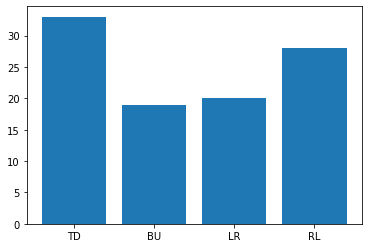

In [62]:
plt.bar(rps_dict.keys(), rps_dict.values())

<BarContainer object of 2 artists>

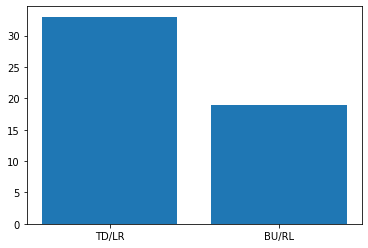

In [63]:
plt.bar(two_dict.keys(), two_dict.values())

<BarContainer object of 4 artists>

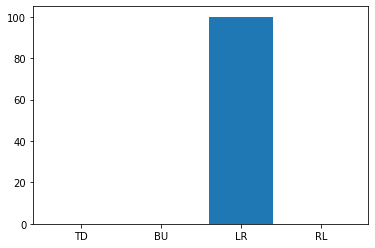

In [64]:
plt.bar(poison_dict.keys(), poison_dict.values())